# Read data

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd

In [5]:
# read train.csv
train_df = pd.read_csv("dataset/train.csv")
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1052495,id0514403,1,2016-04-12 22:53:33,2016-04-12 22:58:25,1,-73.984894,40.744171,-73.985802,40.750736,N,292
200072,id2095083,1,2016-02-25 12:50:38,2016-02-25 12:53:37,1,-73.969398,40.798367,-73.971718,40.795002,N,179
1344869,id1480492,2,2016-02-17 10:49:25,2016-02-17 10:56:55,1,-73.988144,40.735374,-73.978333,40.745483,N,450
160357,id2729577,2,2016-03-22 17:10:27,2016-03-22 17:26:57,1,-73.989189,40.718971,-74.009666,40.720814,N,990
866634,id2943767,1,2016-03-30 17:37:28,2016-03-30 18:39:03,2,-73.781921,40.644596,-73.901199,40.850624,N,3695
823177,id2563839,1,2016-01-03 17:34:19,2016-01-03 17:40:31,2,-73.954575,40.777920,-73.948509,40.774117,N,372
176319,id0668739,1,2016-05-11 23:11:33,2016-05-11 23:29:13,1,-73.968430,40.762001,-74.003784,40.753307,N,1060
370973,id1027932,1,2016-04-17 00:57:58,2016-04-17 01:12:01,1,-73.977829,40.789009,-74.003090,40.750546,N,843
864692,id2666053,1,2016-03-06 11:35:07,2016-03-06 12:05:33,1,-73.988312,40.746147,-73.941902,40.714355,N,1826
823247,id1030699,1,2016-05-24 07:48:18,2016-05-24 07:54:34,1,-73.987839,40.760719,-73.988983,40.753605,N,376


In [6]:
# explore train.csv
train_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# preprocessing data

In [7]:
def preprocessing(data_df):
    # remove any rows with missing data
    data_df = data_df.dropna()

    # convert pickup and dropoff datetime to datetime format
    data_df['pickup_datetime'] = pd.to_datetime(data_df['pickup_datetime'])
    data_df['dropoff_datetime'] = pd.to_datetime(data_df['dropoff_datetime'])

    # split datetime into month, day, week and hour
    data_df['day'] = data_df['pickup_datetime'].dt.day
    data_df['hour'] = data_df['pickup_datetime'].dt.hour
    data_df['month'] = data_df['pickup_datetime'].dt.month
    data_df['week'] = data_df['pickup_datetime'].dt.dayofweek
    return data_df


In [8]:
train_df = preprocessing(train_df)
train_df.sample(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day,hour,month,week
646896,id2422521,2,2016-01-30 17:08:11,2016-01-30 17:11:39,1,-73.950058,40.776009,-73.954788,40.777229,N,208,30,17,1,5
946283,id1643442,1,2016-02-06 11:30:41,2016-02-06 11:43:40,1,-73.992630,40.737206,-74.014305,40.715439,N,779,6,11,2,5
874452,id3186968,1,2016-03-06 05:03:37,2016-03-06 05:20:10,3,-73.991570,40.764893,-73.940224,40.835178,N,993,6,5,3,6
1053399,id3823464,1,2016-03-14 14:08:57,2016-03-14 14:17:33,3,-73.955490,40.788277,-73.955605,40.781460,N,516,14,14,3,0
417440,id1793097,2,2016-04-24 16:51:06,2016-04-24 17:11:01,1,-73.994453,40.750710,-73.960518,40.781528,N,1195,24,16,4,6
1309200,id2105738,1,2016-03-06 19:23:33,2016-03-06 19:28:03,1,-73.972610,40.757881,-73.972916,40.749233,N,270,6,19,3,6
1030056,id0819365,2,2016-06-01 07:22:40,2016-06-01 07:37:37,1,-73.969902,40.759689,-73.989594,40.756649,N,897,1,7,6,2
96242,id2344694,1,2016-03-19 21:24:33,2016-03-19 21:38:30,2,-74.005371,40.741829,-74.000153,40.730347,N,837,19,21,3,5
1209299,id3840793,2,2016-01-08 14:54:15,2016-01-08 15:01:31,2,-73.983269,40.760735,-73.989845,40.756683,N,436,8,14,1,4
531977,id3054299,2,2016-04-09 00:20:02,2016-04-09 00:34:11,1,-74.008179,40.738029,-73.985321,40.763432,N,849,9,0,4,5


# data Analysis & visualization 

In [32]:


def categorical_histogram(data, column):
    categories = data[column].unique()
    num_categories = len(categories)
    colors = plt.cm.tab10(np.linspace(0, 1, num_categories))
    
    plt.figure(figsize=(10, 6))
    data[column].value_counts().plot(kind='bar', color=colors)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title('Histogram of '+column)
    plt.show()



def numerical_histogram(data, column):
    fig, axs = plt.subplots(1, 1, figsize=(16, 4))
    # the x axis should be not be in float format
    axs.xaxis.set_major_locator(MaxNLocator(integer=True))
    # split the histogram into 100 bins
    axs.hist(data[column], bins=100)

    
    axs.set_title('Histogram of '+column)
    axs.set_xlabel(column)
    axs.set_ylabel('Count')
    plt.show()
    
def numerical_histogram_columns(data, columns):
    fig, axs = plt.subplots(1, len(columns), figsize=(16, 4))
    for i in range(len(columns)):
        # split the histogram into 100 bins
        axs[i].hist(data[columns[i]], bins=100)
        #axs[i].hist(data[columns[i]])
        axs[i].set_title('Histogram of '+columns[i])
        axs[i].set_xlabel(columns[i])
        axs[i].set_ylabel('Count')
    plt.show()


## vendor_id

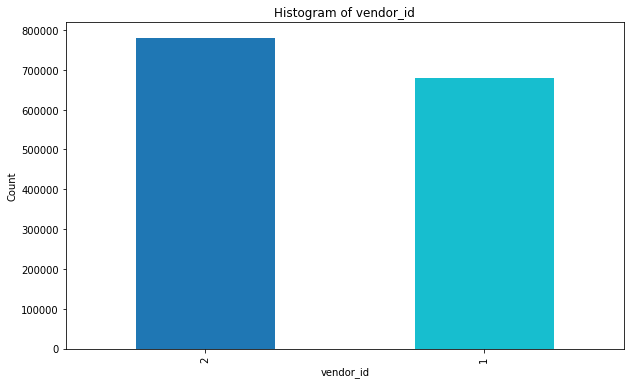

In [10]:
# plot histogram of vendor_id
categorical_histogram(train_df, "vendor_id")

* there are only two vendor_id in the data set, 1 and 2
* vendor_id 2 has more trips than vendor_id 1

## passenger_count

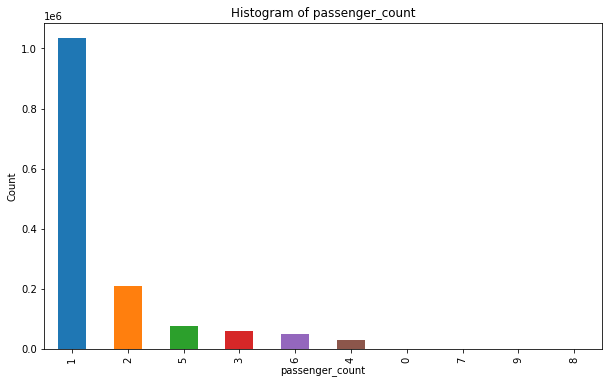

In [11]:
categorical_histogram(train_df, "passenger_count")

* Most of the trips have 1 or 2 passengers

## pickup day and pickup month

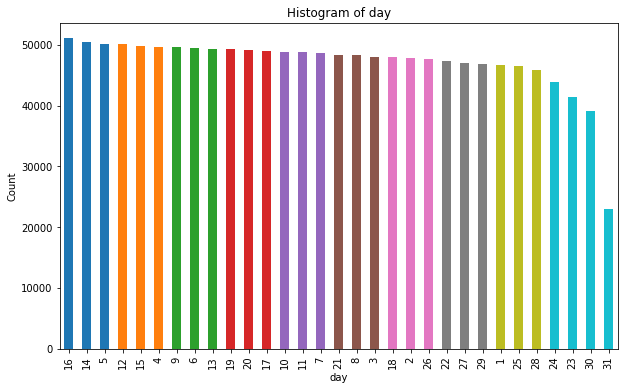

In [12]:
categorical_histogram(train_df, "day")

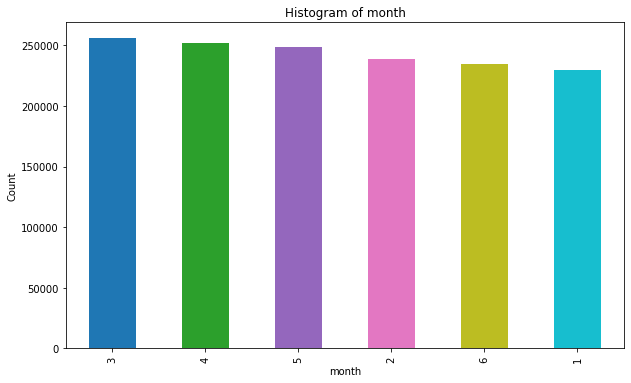

In [13]:
categorical_histogram(train_df, "month")

## pickup hour

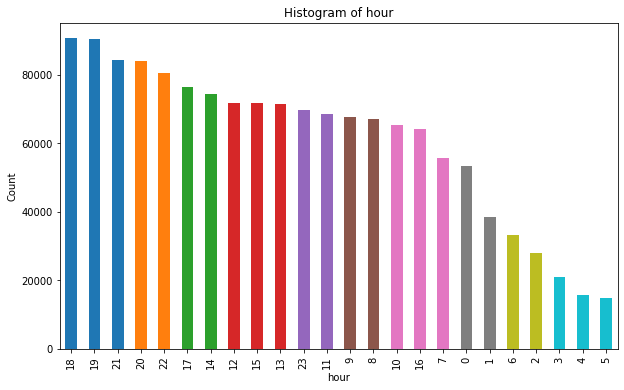

In [14]:
categorical_histogram(train_df, "hour")

* most hours of the day are 6,7 PM

## store_and_fwd_flag

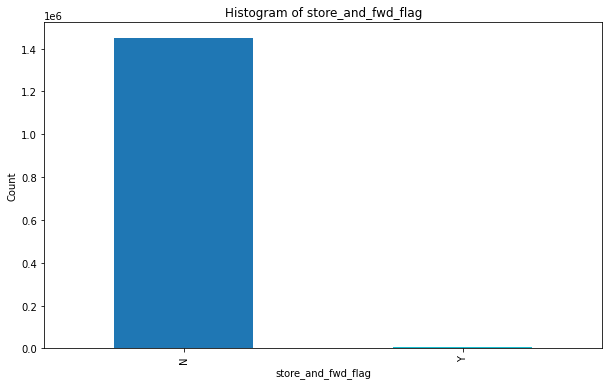

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [15]:
categorical_histogram(train_df, "store_and_fwd_flag")
train_df['store_and_fwd_flag'].value_counts()

* most of the trips are not stored and forwarded In other words, there was a direct connection between the vehicle and the server, allowing the trip data to be sent without the need for temporary storage.

## trip_duration

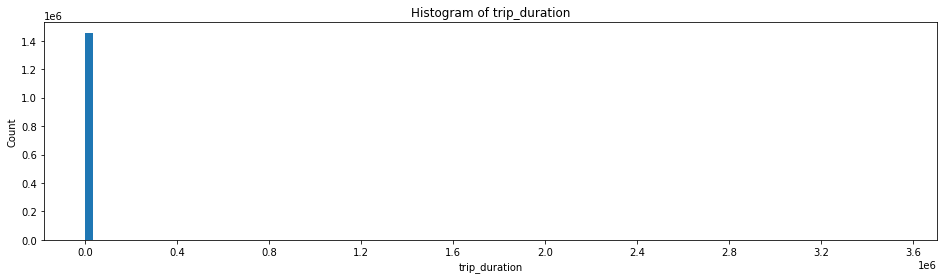

count    1458644.00
mean           0.27
std            1.45
min            0.00
25%            0.11
50%            0.18
75%            0.30
max          979.52
Name: trip_duration_hours, dtype: object

In [34]:
numerical_histogram(train_df, "trip_duration")
## train_df['trip_duration'].describe() but make float point to .2f and divide by 3600 to get hours
train_df['trip_duration_hours'] = train_df['trip_duration']/3600
train_df['trip_duration_hours'].describe().apply(lambda x: format(x, '.2f'))


## latitude and longitude

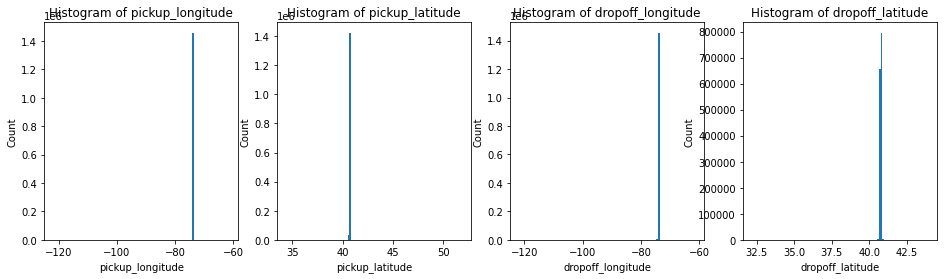

In [23]:
numerical_histogram_columns(train_df, ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])

## correlation between trip_duration and other features

In [17]:
def plotCorrelation(train_df,col1,col2):
    plt.figure(figsize=(10, 6))
    plt.scatter(train_df[col1], train_df[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Scatter plot of '+col1+' vs '+col2)
    plt.show()

In [18]:
# correlation matrix
corr_matrix = train_df.corr()
corr_matrix["trip_duration"].sort_values(ascending=False)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11052/3367316845.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


trip_duration        1.000000
pickup_longitude     0.026542
vendor_id            0.020304
dropoff_longitude    0.014678
passenger_count      0.008471
month                0.006607
hour                 0.003690
day                  0.000566
week                -0.000708
dropoff_latitude    -0.020677
pickup_latitude     -0.029204
Name: trip_duration, dtype: float64

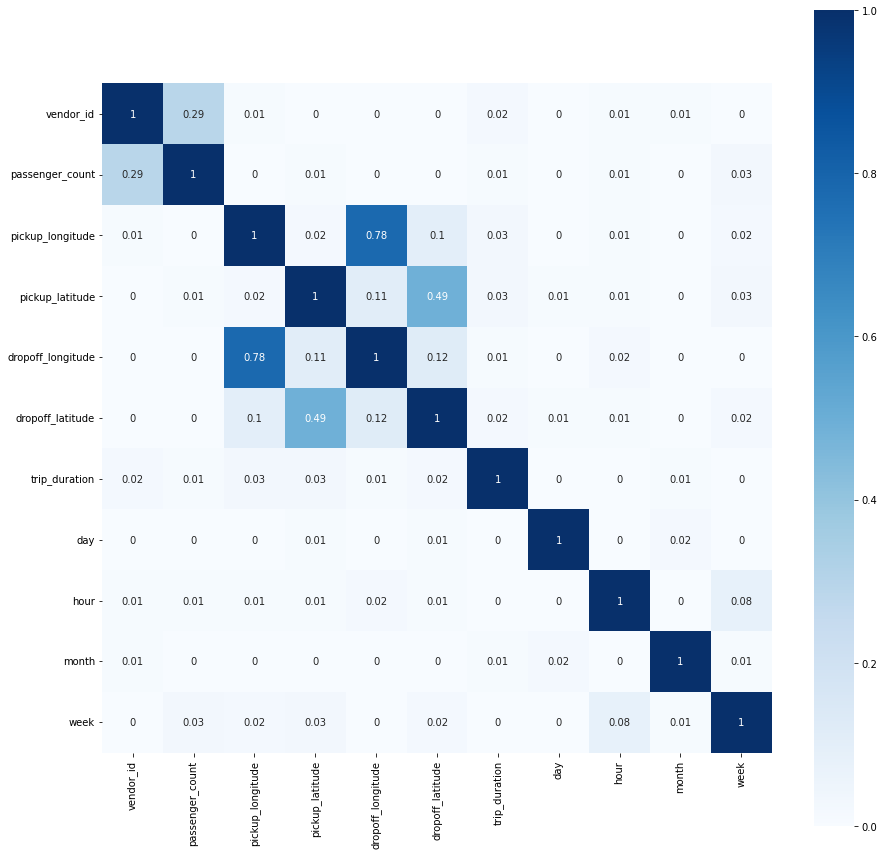

In [19]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(np.abs(np.round(corr_matrix, 2)), square=True, annot=True, cmap=plt.cm.Blues)
plt.show()

## plot the relationship between passenger_count and vendor_id

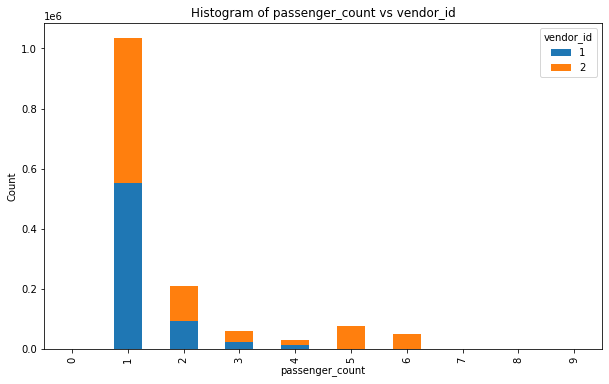

In [29]:
## plot the relationship between passenger_count and vendor_id
train_df.groupby(['passenger_count', 'vendor_id']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('passenger_count')
plt.ylabel('Count')
plt.title('Histogram of passenger_count vs vendor_id')
plt.show()
